In [1]:
!pip install openai==0.28.1


StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 3, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.3 MB/s eta 0:00:00


#### **Azure OpenAI documentation**
##### Azure OpenAI provides access to OpenAI's models including o-series, GPT-4o, GPT-4o mini, GPT-4, GPT-4 Turbo with Vision, GPT-3.5-Turbo, GPT-image-1 and Embeddings model series with the security and enterprise capabilities of Azure.

[https://learn.microsoft.com/en-us/azure/ai-services/openai/](link-URL)

[https://suebayes.substack.com/p/how-to-use-openai-in-microsoft-fabric](link-URL)

In [2]:
import openai
import pandas as pd

# Azure OpenAI configuration
openai.api_type = "azure"
openai.api_base = "https://openaisuebayes.openai.azure.com/"  # replace with yours
openai.api_version = "2023-07-01-preview"  # or your API version
openai.api_key = notebookutils.credentials.getSecret('https://openaisqlbits.vault.azure.net/', 'openaiapikey')

# Your deployed model name (deployment name, not model name)
DEPLOYMENT_NAME = "gpt-35-turbo"  # for example

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 4, Finished, Available, Finished)

[https://suebayes.substack.com/p/how-to-securely-use-azure-key-vault](link-URL)

## 📥 Load the review dataset

In [4]:


def get_response(example):
    response = openai.ChatCompletion.create(
        engine= DEPLOYMENT_NAME,
        messages=[
      {
        "role": "system",
        "content": "You are an expert in restaurant marketing with a specialism in sentiment analysis. \n\nI will give you some reviews and I want you to return one word based on the sentiment. Positive, Negative or Neutral. "
      },
      {
        "role": "user",
        "content": "With all the new upgrades everything looks great and clean great staff"
      },
      {
        "role": "assistant",
        "content": "Positive"
      },
      {
        "role": "user",
        "content": "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places."
      },
      {
        "role": "assistant",
        "content": "Positive"
      },
      {
        "role": "user",
        "content": "We stopped by for a quick breakfast.  It was not crowded inside, but there was a pretty long drive thru.\nOur order was supposed to have 3 food items and 2 drinks. They missed a food item. The lady ignored me when I told her.My husband went to get it, she finished her task then handed it to him without a word or smile or anything."
      },
      {
        "role": "assistant",
        "content": "Negative"
      },
      {
        "role": "user",
        "content": "The morning crew seems fast and efficient. Night crew is a whole different experience, lines down the street, hour long waits. If this was a one time occurrence it wouldn't be so bad but this is a nightly problem. Beyond this the staff is so highly rude you leave wanting to crash your car through the building. Don't forget they will mistake your order almost every single time as well and serve it to you cold."
      },
      {
        "role": "assistant",
        "content": "Negative"
      },
      {
        "role": "user",
        "content": "Me and my girlfriend came tonight to pick up our food after 11pm for a mobile order, they need a better system if you are walking on foot. The food tasted great, loved the McDonald's deal ordering from the app."
      },
      {
        "role": "assistant",
        "content": "Neutral"
      },
      {
        "role": "user",
        "content": "Been frequenting this location for a few years.Morning,mid-day and night,the food is always hot,fresh and served with a smile."
      },
      {
        "role": "assistant",
        "content": "Positive"
      },
     {
      "role": "user",
      "content": f"""{example} """
    }
    ],
    temperature=1, #Controls creativity of the response
    max_tokens=256, #The maximum number of tokens the model is allowed to generate in its reply.  
    top_p=1,  #Leave at 1 for standard use. Lower it (like 0.8) if you want tighter responses
    frequency_penalty=0,  #Discourages repetition within the same output.  Not useful for sentiment, so 0 is fine.
    presence_penalty=0    #Discourages introducing new topics not in the prompt.
  )
    return response.choices[0].message.content

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 6, Finished, Available, Finished)

## ✅ What choices[0] Means
##### When you call openai.ChatCompletion.create(), the model returns a response object like this:
##### 
##### json
##### Copy
##### Edit
```
{
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Positive"
      },
      ...
    }
  ]
}
```
##### The .choices list contains all the completion options (or "answers") the model generated.
##### 
##### If you only request one completion (which is the default), there will only be one item in that list — at index 0.

https://www.youtube.com/watch?v=VD0wIiLVSRA

In [5]:
#Test
get_response("""I work for door dash and they locked us all out to wait in a long line for no reason at 10. I tried to beg them to open it because I'm door dash and they refused. Covid is over get a new job""")

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 7, Finished, Available, Finished)

'Negative'

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/databayes/OpenAI/refs/heads/main/McD%20Reviews.csv')
df['Review'] = df['Review'].str.strip()
df.columns = df.columns.str.strip()
df.head()
df.shape

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 8, Finished, Available, Finished)

(500, 3)

In [7]:
df['Review']

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 9, Finished, Available, Finished)

0      It'd McDonalds. It is what it is as far as the...
1      I repeat my order 3 times in the drive thru, a...
2      I work for door dash and they locked us all ou...
3      If I  could give this location a zero on custo...
4      Went thru drive thru. Ordered. Getting home no...
                             ...                        
495    This week I went twice for coffee I ask for it...
496                                            Excellent
497                  Excellent place and excellent staff
498    You can buy food and eat. Very tasty hot choco...
499                                               all ok
Name: Review, Length: 500, dtype: object

In [8]:
df2 = df[100:200].copy()
df2.shape

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 10, Finished, Available, Finished)

(100, 3)

In [9]:
df2['GPT Sentiment'] = df2['Review'].apply(get_response)

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 11, Finished, Available, Finished)

In [10]:
df2

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 12, Finished, Available, Finished)

,ID,Review,Rating,GPT Sentiment
100,101,24 hour drive through but they start breakfast...,Neutral,Negative
101,102,So bad they had to re-engineer their quarter p...,Negative,Negative
102,103,"night crew will 100% get your order wrong, jus...",Negative,Negative
103,104,EDIT: Recently this McDonald's had been improv...,Positive,Mixed
104,105,Good place,Positive,Neutral
...,...,...,...,...
195,196,Quick and ordera always come out right,Positive,Positive
196,197,Doing through the drive thru is super fast. 9...,Positive,Positive
197,198,Just got back from extremely long drive throug...,Negative,Negative
198,199,Had to wait 13 minutes for a sausage biscuit m...,Negative,Negative


## 🧠 Sentiment Comparison: Human vs GPT

Now that we’ve used GPT to classify sentiment, it's important to compare its decisions with existing human-assigned labels. This gives us a powerful quality assurance mechanism and highlights where AI might interpret things differently from a person.

### 🔍 Why Do This?

- Identify disagreements between model and human judgement
- Understand potential **biases, ambiguities**, or **inconsistencies**
- Improve our prompt design or review criteria
- Build trust by explaining **why** GPT made its choice

### 🛠️ What Happens Here?

1. We **compare** each review's human label (`Rating`) with the GPT-generated label (`GPT Sentiment`).
2. If they **don't match**, we generate a **simple explanation** for the GPT decision.
3. We show a **heatmap** of agreement vs disagreement.
4. We display a sample table of mismatched reviews with GPT explanations.

### 📈 Real-World Value

- This technique supports **model validation**, training data auditing, and root cause analysis.
- In customer feedback pipelines, it can flag **ambiguous reviews** for human escalation.
- It enables **human-in-the-loop systems** where AI and analysts collaborate more effectively.

➡️ Let’s take a look at how often the GPT sentiment matched the original rating and explore some examples.


StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 13, Finished, Available, Finished)

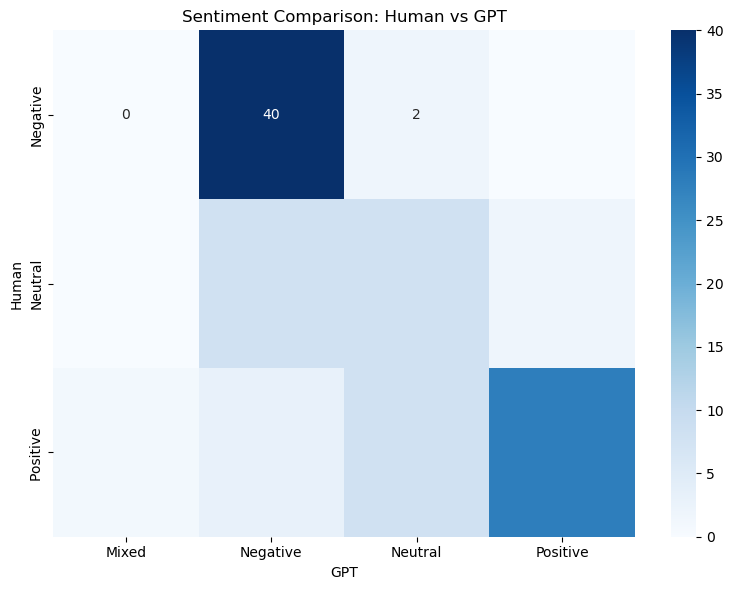

,Review,Rating,GPT Sentiment,GPT Explanation
100,24 hour drive through but they start breakfast...,Neutral,Negative,Classified as Negative due to review wording.
103,EDIT: Recently this McDonald's had been improv...,Positive,Mixed,Classified as Mixed due to review wording.
104,Good place,Positive,Neutral,Classified as Neutral due to review wording.
105,"Look, it is good food for the money. It is fas...",Positive,Positive,Classified as Positive due to review wording.
109,Understand McDonald's is under construction bu...,Positive,Positive,Classified as Positive due to review wording.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Function to compare mismatches and explain differences
def compare_mismatches(df, review_col='Review', human_label_col='Rating', gpt_label_col='GPT Sentiment'):
    mismatch_df = df[df[human_label_col] != df[gpt_label_col]].copy()
    mismatch_df['GPT Explanation'] = mismatch_df.apply(
        lambda row: f"Classified as {row[gpt_label_col]} due to review wording.", axis=1
    )
    return mismatch_df

# ✅ Function to create a confusion matrix heatmap
def plot_sentiment_comparison_heatmap(df, human_label_col='Rating', gpt_label_col='GPT Sentiment'):
    confusion = pd.crosstab(df[human_label_col], df[gpt_label_col], rownames=['Human'], colnames=['GPT'], dropna=False)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
    plt.title('Sentiment Comparison: Human vs GPT')
    plt.tight_layout()
    plt.show()

# ✅ Usage
mismatched_reviews = compare_mismatches(df2)  # df2 should already include 'Review', 'Rating', and 'GPT Sentiment'
plot_sentiment_comparison_heatmap(df2)

# ✅ Optional: Display mismatches in Fabric or Jupyter
mismatched_reviews[['Review', 'Rating', 'GPT Sentiment', 'GPT Explanation']].head()





In [12]:
pd.crosstab(df['Rating'], df2['GPT Sentiment'])

StatementMeta(, 767b93c6-50ab-4e3d-a4d5-1ad0b71e5d45, 14, Finished, Available, Finished)

GPT Sentiment,Mixed,Negative,Neutral,Positive
Rating,,,,
Negative,0,40,2,0
Neutral,0,8,8,2
Positive,1,3,8,28
